# Sagehen Temperature Data

### Setup

In [2]:
conda install geopandas

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Run this cell to import the packages we will need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
%matplotlib inline

### Load in Data

Had to convert Excel (.xls) file to a shapefile using mygeodata.cloud. It correctly recognized the EPSG as 26910!

In [6]:
climate_data = gpd.read_file('data/climate_data.shp')
climate_data.head()

,Plot #,Easting,Northing,Elevation,Aspect,Slope,geometry
0,1,735009.0,4369001.0,2040,176,9,POINT (735009.000 4369001.000)
1,2,734492.0,4369007.0,2047,164,12,POINT (734492.000 4369007.000)
2,3,734500.0,4368507.0,2079,50,34,POINT (734500.000 4368507.000)
3,4,735017.0,4368525.0,2015,32,50,POINT (735017.000 4368525.000)
4,5,735494.0,4368487.0,1995,25,2,POINT (735494.000 4368487.000)


### Double check EPSG Code

In [7]:
len(climate_data['Plot #'].unique())

524

In [8]:
climate_data.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Data Cleaning

The following cell selects the Plot #'s that we have logger data on and stores them in `climate_data_clean`.

NOTE: The data has 24 loggers with 0, 0 as their coordinates. Also, there was a duplicate row for logger #496 which is removed in the following cell.

In [9]:
logger_list = ['135', '104', '157', '133', '151', '024', '023', '012', '048', '077', '084', '082', '096', '054', '031', '052', '097', '030', '496', '006', '121', '119', '126', '110', '153', '136', '109', '137', '108', '073', '080', '020', '018', '016', '029', '075', '086', '088', '028', '026', '021', '032', '095', '050', '034', '033', '002', '056', '093', '058', '094', '112', '123', '124', '125', '122', '114', '113', '182', '149']

#Getting rid of leading zeros
logger_list = np.sort([x.lstrip('0') for x in logger_list])

climate_data_clean = climate_data.loc[climate_data['Plot #'].isin(logger_list)].drop_duplicates()
climate_data_clean.head()

,Plot #,Easting,Northing,Elevation,Aspect,Slope,geometry
1,2,734492.0,4369007.0,2047,164,12,POINT (734492.000 4369007.000)
5,6,735503.0,4368999.0,2019,250,15,POINT (735503.000 4368999.000)
11,12,733504.0,4369000.0,2152,164,15,POINT (733504.000 4369000.000)
15,16,733500.0,4367991.0,2164,66,8,POINT (733500.000 4367991.000)
17,18,734499.0,4367996.0,2137,44,7,POINT (734499.000 4367996.000)


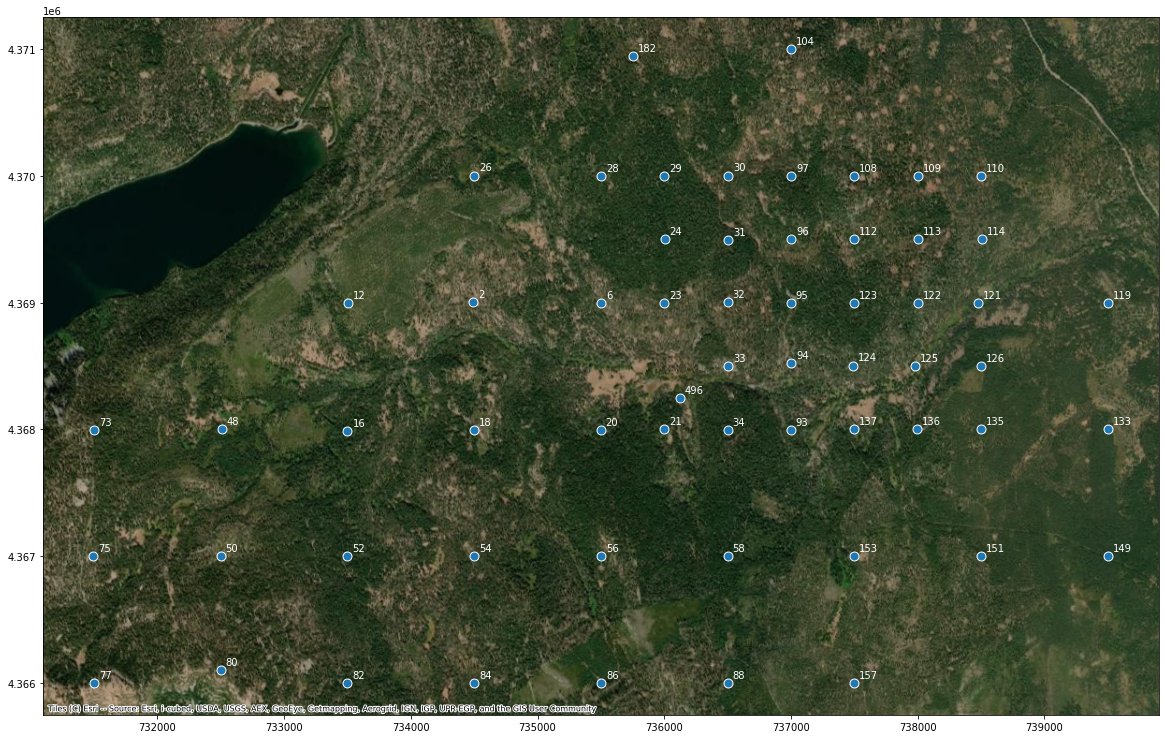

In [10]:
ax = climate_data_clean.plot(figsize=(20, 20), edgecolor='white', markersize=80)
for x, y, label in zip(climate_data_clean['Easting'], climate_data_clean['Northing'], climate_data_clean['Plot #']):
    ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points", color='white')
    
ctx.add_basemap(ax, crs=climate_data_clean.crs.to_string(), source=ctx.providers.Esri.WorldImagery)